<a href="https://colab.research.google.com/github/MolkaHaddar/Traitement--image-video/blob/main/Copie_de_initiation_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Traitements de base des images avec Jupyter Notebook
# Introduction
Notre monde d’aujourd’hui regorge de données et les images en constituent une partie importante. Cependant, pour pouvoir être utilisées, ces images doivent être traitées. Le traitement d’images consiste donc à analyser et à manipuler une image numérique principalement dans le but d’en améliorer la qualité ou d’en extraire des informations qui pourraient ensuite être utilisées.

Python devient un choix judicieux pour de telles tâches de traitement d’images. Cela est dû à sa popularité croissante en tant que langage de programmation scientifique et à la disponibilité gratuite de nombreux outils de traitement d’images de pointe dans son écosystème.

Dans ce TP, vous allez examiner quelques-unes des bibliothèques Python les plus couramment utilisées pour les tâches de manipulation d’images.
## I. Affichage d'images

Sous le paquet open source Python:``scikit-image``, une image I est représentée par une matrice ``numpy``. 

L'élément de base est appelée **pixel** qui représente simultanément un point de l'image et un élément de la matrice.


### I.1 Systèmes de coordonnées des images

|Type d'image |Coordonnées|
|:---|:---|
|Image 2D en niveaux de gris|(ligne, colonne)|
|Image 2D multibande|(ligne, colonne, bande)|
|Image 3D en niveaux de gris (ou volume) |(plan, ligne, colonne)|
|Image 3D multibande|(plan, ligne, colonne, bande)|

In [ ]:
%matplotlib inline

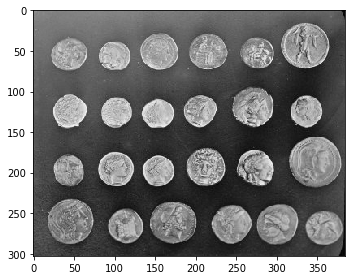

In [ ]:
from skimage import data
from skimage import io
from matplotlib import pyplot as plt
image1 = data.coins()
io.imshow(image1) # afficher l'image coins 
plt.show()

### I.2. Types des données (images)

On trouve plusieurs conventions pour répresenter les valeurs des pixels d'une image:

```
  0 - 255   avec  0 est noir, 255 est blanc
  0 - 1     avec  0 est noir, 1 est blanc
```

Le type de l'image est déterminé par ``.dtype`` .


In [ ]:
# exemple 1
image1.dtype

dtype('uint8')

On prend l'exemple du code ci-dessous permettant de générer deux images en niveaux de gris ayant deux différents types:

image0: float64 0.0 1.0
image1: uint8 0 255


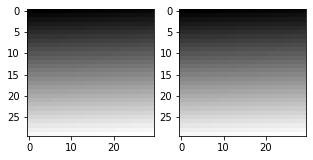

In [ ]:
# exemple 2
#import bibliotheques necessaires
import numpy as np
from matplotlib import pyplot as plt
#changer la dimension de l'image et utiliser des pixel de type entier et float
image0 = np.linspace(0, 1, 900).reshape((30, 30))
image1 = np.linspace(0, 255, 900).reshape((30, 30)).astype(np.uint8)
#afficher les caracteristiques (type, minimum et maximum valeur dans la matrice) de l'image
print("image0:", image0.dtype, image0.min(), image0.max())
print("image1:", image1.dtype, image1.min(), image1.max())
#afficher les deux images dans une figure
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5, 5))
ax0.imshow(image0, cmap='gray')
ax1.imshow(image1, cmap='gray')
plt.show()

 **Question 1:** Expliquer chaque commande dans le code précedent.

On peut changer le type des images en utilisant les deux représentations suivantes: `` img_as_float`` et `` img_as_ubyte``, etc. On prend l'exemple suivant: 

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

max_image1/255 = 0.9058823529411765


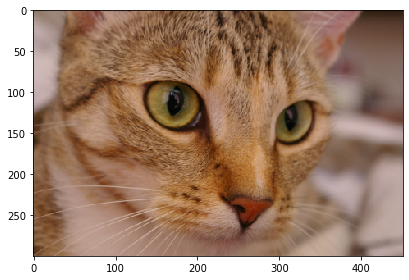

In [ ]:
#import les deux méthodes de changement du type
from skimage import img_as_float, img_as_ubyte
#import data de la bibliotheque skimage
from skimage import data
#charger l'image chelsea depuis data et le converter en ubyte avec la methode img_as_ubyte et en float avec la methode img_as_float
image = data.chelsea()
io.imshow(image)
image1 = img_as_ubyte(image)
image2 = img_as_float(image)
#afficher les caracteristiques (type, minimum et maximum valeur dans la matrice) de chaque image
print("type, min, max:", image1.dtype, image1.min(), image1.max())
print("type, min, max:", image2.dtype, image2.min(), image2.max())
print()
#afficher la valeur maximal normaliser
print("max_image1/255 =", image1.max()/255.)

**Question 2:** Expliquer chaque commande dans le code précedent.

### I.2. Affichage des images (aléatoire, en niveaux de gris et en couleurs)

On prend dans ce qui suit quelques exemples pour afficher des images de type aléatoire, en niveaux de gris et en couleurs.

#### Exemple 1: Image aléatoire

In [ ]:
#generer une nombre aléatoire
np.random.random?

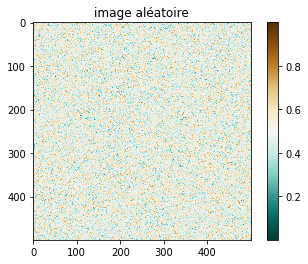

In [ ]:
#import numpy et pyplot
import numpy as np
from matplotlib import pyplot as plt
#generer une image  aléatoire (c'est a dire chaque pixel a un valeur aléatoire) de définition 500x500 
random_image = np.random.random([500, 500])
#ajouter l'image niveau de gris dans une figure
plt.imshow(random_image, cmap='BrBG_r')
#ajouter un titre a cette figure
plt.title('image aléatoire')
#ajouter la barre de couleur pour identifier le niveau de gris
plt.colorbar();
#afficher l'image
plt.show()

**Question 3:** Expliquer chaque commande dans le code précedent.

#### Exemple 2: Image en niveaux de gris

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


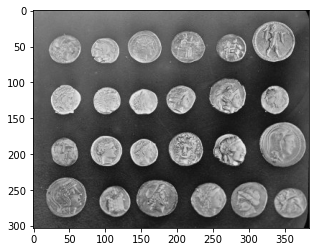

In [ ]:
#importer data de skimage
from skimage import data
#charger l'image coins
coins = data.coins()
#afficher le type de variable coins
print('Type:', type(coins))
#afficher le type des données dans la matrice
print('dtype:', coins.dtype)
#afficher la définition de l'image
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');
plt.show()

**Question 4:** Expliquer chaque commande dans le code précedent.

#### Exemple 3: Image en couleurs RVB

Une image couleur est une matrice 3D, dont la troisième dimension est égale à 3 et représente les cannaux rouge (R), vert (V) et bleu (B):

Shape: (300, 451, 3)
Values min/max: 0 231


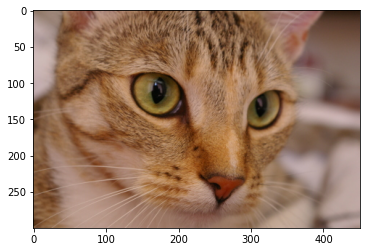

In [ ]:
# exemple 1
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);
plt.show()

Shape: (512, 512, 3)
Values min/max: 0 255


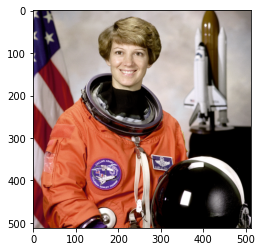

In [ ]:
# exemple 2
astronaut = data.astronaut()
print("Shape:", astronaut.shape)
print("Values min/max:", astronaut.min(), astronaut.max())

plt.imshow(astronaut);
plt.show()

### I.3.  Images I/O

Dans les exemples précédents, on a utilisé des exemples d'images à partir de données existants dans ``scikit-image``. Dans d'autres cas, on peut utiliser des images qui sont enregistrées sous forme JPEG ou PNG, etc. 

Par exemple:
```python
from skimage import io

# charger l'image Lena dans une variable X
X = io.imread('images/lena.jpg')

# Voir les caractéristiques de l'image Lena

print(type(X))
print(X.dtype)
print(X.shape)
print(X.min(), X.max())

# Afficher la matrice de l'image X 
plt.imshow(X);

# Sauvegarder l'image X dans une nouvelle image avec un autre nom
plt.imsave('images/image_lena.jpg', X) # save image to disk
```

**Question 5:** Tester l'exemple ci-dessus.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
trait_img_vid_folder='/content/drive/MyDrive/trait_img_vid/'

Mounted at /content/drive


<class 'numpy.ndarray'>
uint8
(220, 220, 3)
0 255


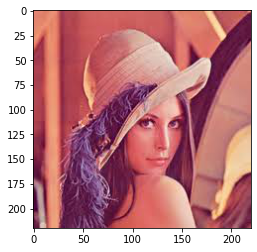

In [ ]:
from skimage import io
X = io.imread(trait_img_vid_folder+'/TP1/images/lena.jpg')
print(type(X))
print(X.dtype)
print(X.shape)
print(X.min(), X.max())
plt.imshow(X);
plt.show()
plt.imsave(trait_img_vid_folder+'/TP1/images/lena.jpg', X) # save image to disk

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving lena.jpg to lena (1).jpg


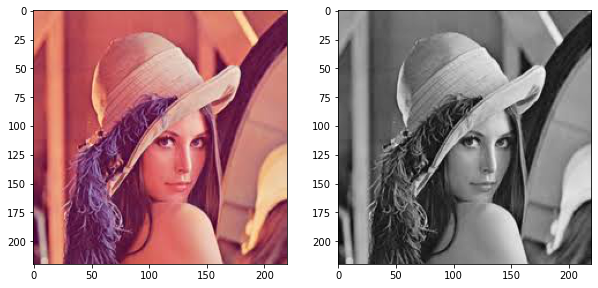

In [ ]:
#Exercice1:
from skimage import color,io,util
import matplotlib.pyplot as plt
lena = io.imread('lena.jpg')
lena_gray = color.rgb2gray(lena)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))
ax0.imshow(lena)
ax1.imshow(lena_gray,cmap='gray')
plt.show()
io.imsave('lena_Gray.jpg', lena_gray,cmap='gray')

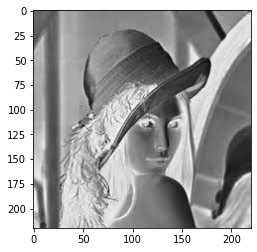

In [ ]:
#Exercice2
lena_gray_inv = lena_gray
for i in range(0,lena_gray.shape[0]):
  for j in range (0 ,lena_gray.shape[1]):
    lena_gray_inv[i][j]= 255 - lena_gray[i][j]
#soint le boucle soit par :imageinversé=255-image
plt.imshow(lena_gray_inv,cmap='gray')
io.imsave('lena_Gray_inv.jpg', lena_gray_inv,cmap="gray")

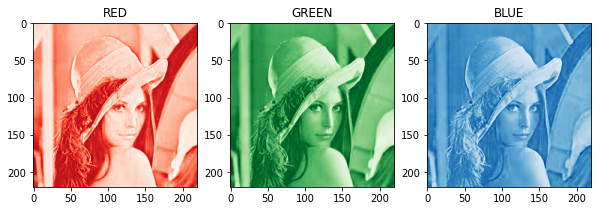

In [ ]:
#Exercice 3:
r = lena[:,:,0]
g = lena[:,:,1]
b = lena[:,:,2]
fig,axes = plt.subplots(1,3,figsize=(10, 10))
axes[0].imshow(r,cmap='Reds_r')
axes[0].set_title('RED')
axes[1].imshow(g,cmap='Greens_r')
axes[1].set_title('GREEN')
axes[2].imshow(b,cmap='Blues_r')
axes[2].set_title('BLUE')
io.imsave('lena_Gray_inv.jpg', lena_gray_inv,cmap="gray")

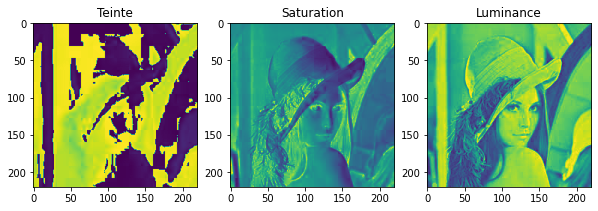

In [ ]:
#Exercice 4
lena = io.imread('lena.jpg')
hsv_img = color.rgb2hsv(lena)
h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]
fig,axes = plt.subplots(1,3,figsize=(10, 10))
axes[0].imshow(h)
axes[0].set_title('Teinte')
axes[1].imshow(s)
axes[1].set_title('Saturation')
axes[2].imshow(v)
axes[2].set_title('Luminance')
io.imsave('lena_HSV.jpg', hsv_img)

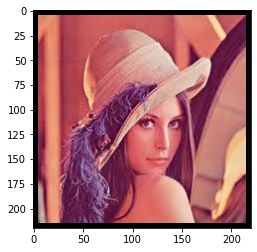

In [ ]:
#Exercice 5
import numpy as np
def cadre_noir(img,ep):
 x=np.zeros(img.shape).astype(np.uint8)
 x[ep:-ep:, ep:-ep,]=img[ep:-ep:, ep:-ep,]
 return x;
lena = io.imread('lena.jpg')
x=cadre_noir(lena,5);
plt.imshow(x);
plt.show()

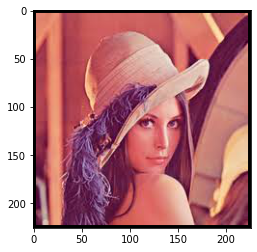

(226, 226, 3)

In [ ]:
#exercice 6
def rajout_cadre(img,ep):

  x=np.zeros((img.shape[0]+2*ep,img.shape[1]+2*ep,3)).astype(np.uint8)
  x[ep:-ep:, ep:-ep,]=img
  return x;
lena = io.imread('lena.jpg')
x=rajout_cadre(lena,3);
plt.imshow(x);
plt.show()
x.shape 